#单因素方差分析

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data= pd.read_excel('data_salary.xlsx',index_col=0)
# 先来看下从城市因素开始分析，
df_city=data.melt(var_name='城市',value_name='月薪')#使用melt（）函数将读取数据进行结构转换，以满足ols（）函数对数据格式的要求，melt（）函数能将列标签转换为列数据

In [3]:
df_city

,城市,月薪
0,河南,5890
1,河南,5393
2,河南,6021
3,河南,5390
4,河南,5548
...,...,...
67,上海,15425
68,上海,12000
69,上海,9373
70,上海,9897


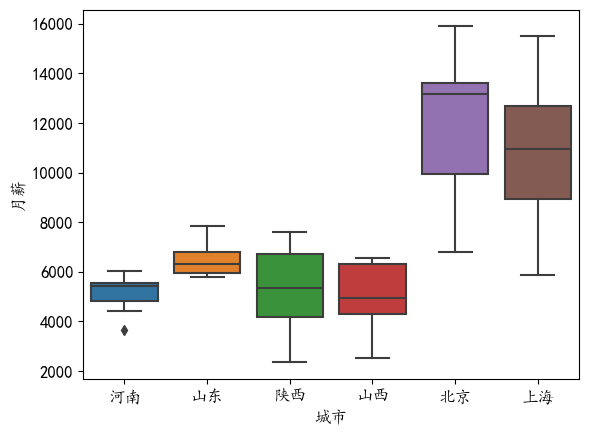

In [5]:
import matplotlib.pyplot  as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
import pandas as pd
import seaborn as sns
data= pd.read_excel('data_salary.xlsx',index_col=0)
data_melt = data.melt()
data_melt.columns = ['城市', '月薪']
sns.boxplot(x = '城市', y = '月薪', data = data_melt)
plt.show()

In [6]:
#进行方差分析
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data= pd.read_excel('data_salary.xlsx',index_col=0)
# 先来看下从城市因素开始分析，
df_city=data.melt(var_name='城市',value_name='月薪')#使用melt（）函数将读取数据进行结构转换，以满足ols（）函数对数据格式的要求，melt（）函数能将列标签转换为列数据
model_city=ols('月薪~C(城市)',df_city).fit()# ols（）创建一线性回归分析模型
anova_table=anova_lm(model_city)# anova_lm（）函数创建模型生成方差分析表
print(anova_table)
# 进行事后比较分析
print(pairwise_tukeyhsd(df_city['月薪'], df_city['城市']))

            df        sum_sq       mean_sq          F        PR(>F)
C(城市)      5.0  6.208263e+08  1.241653e+08  31.090471  4.042115e-16
Residual  66.0  2.635826e+08  3.993676e+06        NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
    上海     北京     1098.5 0.7581 -1296.0995  3493.0995  False
    上海     山东 -4532.3333    0.0 -6926.9328 -2137.7338   True
    上海     山西 -6045.5833    0.0 -8440.1828 -3650.9838   True
    上海     河南 -5844.4167    0.0 -8239.0162 -3449.8172   True
    上海     陕西 -5802.1667    0.0 -8196.7662 -3407.5672   True
    北京     山东 -5630.8333    0.0 -8025.4328 -3236.2338   True
    北京     山西 -7144.0833    0.0 -9538.6828 -4749.4838   True
    北京     河南 -6942.9167    0.0 -9337.5162 -4548.3172   True
    北京     陕西 -6900.6667    0.0 -9295.2662 -4506.0672   True
    山东     山西   -1513.25 0.4388 -3907.8495   881.3495  False
   

In [ ]:
# 上半部分中df为自由度
# sum_sq为误差平方和
# mean_sq为平均平方
# F代表统计量F值
# PR(>F)代表显著性水平P值
# 下半部分为多重比较，进行事后分析
# group1以及group2表示的是因子的不同水平，然后分析他们两个组是否有显著性差异
# 最后面的reject表示是否拒绝原假设，True表示的是拒绝原假设，说明两组均值有显著性差异

In [13]:
path1 =r"remapbiled_tas_yearly_EC-Earth3_ssp126_r1i1p1f1_gr_201501-210012.nc"
cmip6 = xarray.open_dataset(path1).tas.loc["2005":"2015",:,:]
fig = plt.figure(figsize=(3,3),dpi=60)#画布
ax = fig.add_axes([1,1,1.5,1.5])#画层
sns.distplot(cmip6,#数据                 
           color='red',#概率密度线的颜色
           ax=ax,
           label="tas-temp",#蓝色线条的名称
           )

NameError: name 'xarray' is not defined